In [350]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df=pd.read_csv('advertising_linear_150.csv')
df.head()

,TV_spend,radio_spend,social_spend,sales_k
0,94,40,23,34.066898
1,53,25,9,19.241218
2,203,41,21,36.796765
3,204,31,5,22.896566
4,223,38,14,34.806367


In [351]:
df.isnull().sum()
df.duplicated().sum()

np.int64(0)

In [352]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TV_spend      150 non-null    int64  
 1   radio_spend   150 non-null    int64  
 2   social_spend  150 non-null    int64  
 3   sales_k       150 non-null    float64
dtypes: float64(1), int64(3)
memory usage: 4.8 KB


In [353]:
df.columns.str.strip()
df.shape

(150, 4)

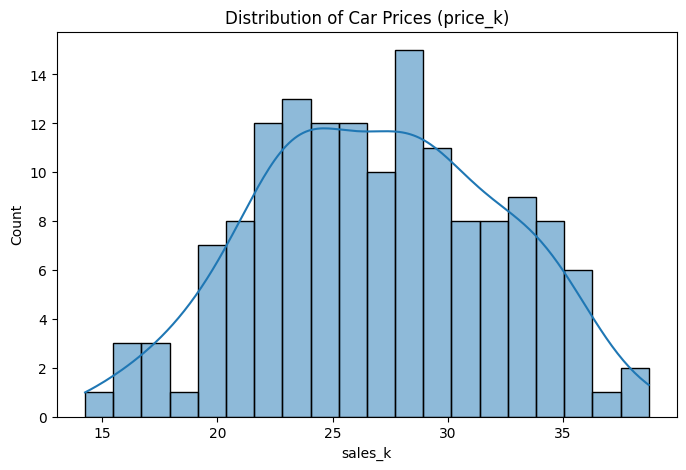

In [354]:
plt.figure(figsize=(8,5))
sns.histplot(df["sales_k"],kde=True,bins=20)
plt.title("Distribution of Car Prices (price_k)")
plt.show()

<Axes: >

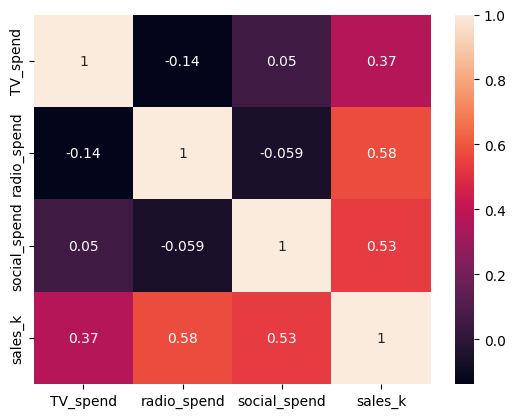

In [355]:
sns.heatmap(df.corr(),annot=True)

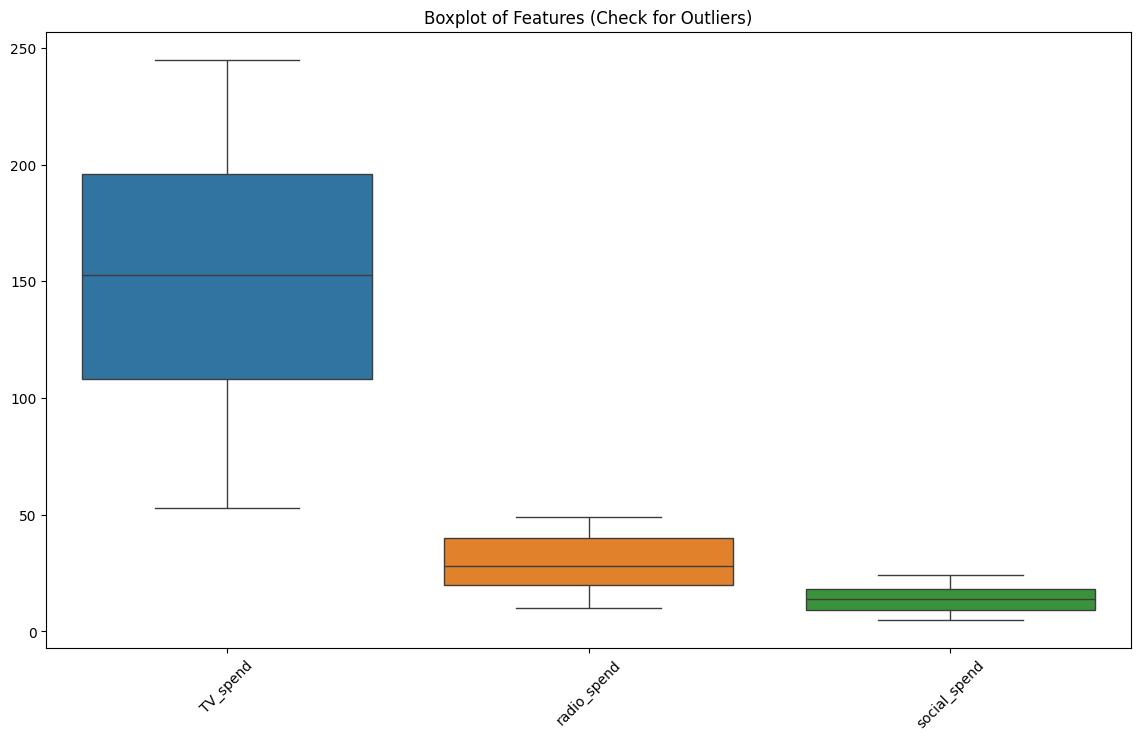

In [356]:
plt.figure(figsize=(14,8))
sns.boxplot(data=df.drop("sales_k", axis=1))
plt.xticks(rotation=45)
plt.title("Boxplot of Features (Check for Outliers)")
plt.show()

In [357]:
def correlation(dataset,threshold):
    col_corr=set()
    corr_matrix=dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>threshold:
                colname=corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [358]:
corr=correlation(df,0.85)
corr

set()

In [359]:
df.drop(corr,axis=1,inplace=True)

In [360]:
df

,TV_spend,radio_spend,social_spend,sales_k
0,94,40,23,34.066898
1,53,25,9,19.241218
2,203,41,21,36.796765
3,204,31,5,22.896566
4,223,38,14,34.806367
...,...,...,...,...
145,87,24,16,24.340334
146,116,22,11,24.653420
147,236,28,14,30.463628
148,118,15,14,19.525141


In [369]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
x = df[['TV_spend','radio_spend','social_spend']]
y = df['sales_k']
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)
model=Ridge()
model.fit(x_train, y_train)
a=scaler.transform(np.array([[94,40,23]]))
y_pred=model.predict(a)
print(y_pred)

[32.56710864]


c:\Users\kishore\AI WORKFORCE DAY 13\anaconda\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [362]:
import pickle

In [363]:
pickle.dump(scaler,open('scaler.pkl','wb'))
pickle.dump(model,open('model.pkl','wb'))